In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data
Go here: https://drive.google.com/drive/folders/0B5Wu8z15TIbiLUhvcWxaMDJCRGs

Get this data set: 10000-Patients.zip

unzip it into the Data folder

In [169]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

In [44]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)


In [47]:
# 1) 
p = pd.read_csv('/home/dir0417/Desktop/BIOS6644-master/Data/PatientCorePopulatedTable.txt', header=0,sep = '\t')
a = pd.read_csv('/home/dir0417/Desktop/BIOS6644-master/Data/AdmissionsCorePopulatedTable.txt', header=0, sep='\t')
d = pd.read_csv('/home/dir0417/Desktop/BIOS6644-master/Data/AdmissionsDiagnosesCorePopulatedTable.txt', header=0, sep='\t')  
l = pd.read_csv('/home/dir0417/Desktop/BIOS6644-master/Data/LabsCorePopulatedTable.txt', header=0, sep='\t')            


In [62]:
p.loc[p.PatientID=='915BC24E-8C44-4D33-A386-CEA965B83F32']

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
9687,915BC24E-8C44-4D33-A386-CEA965B83F32,Male,1921-12-20 07:51:09.003,Asian,Single,English,15.95


In [69]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type
type(p.PatientDateOfBirth[3])


str

In [83]:

# 1) 
for table in [p,a,d,l]:
    for col in table.columns:
        if 'date' in col.lower():
            print('Converting {}'.format(col))
            table[col] = pd.to_datetime(table[col])

Converting PatientDateOfBirth
Converting AdmissionStartDate
Converting AdmissionEndDate
Converting LabDateTime


In [150]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# '327A3C2F-B234-400B-B994-833073C014C0'

thispatient = '327A3C2F-B234-400B-B994-833073C014C0'
p.loc[p.PatientID==thispatient]


,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
8097,327A3C2F-B234-400B-B994-833073C014C0,Female,1962-06-14 05:01:30.953,Asian,Single,English,18.96


In [151]:
a.loc[a.PatientID==thispatient]

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
15184,327A3C2F-B234-400B-B994-833073C014C0,1,1985-05-02 03:28:04.047,1985-05-07 02:33:18.970
15185,327A3C2F-B234-400B-B994-833073C014C0,2,1993-01-26 22:14:39.247,1993-02-01 22:25:06.137
15186,327A3C2F-B234-400B-B994-833073C014C0,3,1998-10-26 15:55:32.827,1998-11-03 02:48:41.307
15187,327A3C2F-B234-400B-B994-833073C014C0,4,2005-11-03 07:41:26.787,2005-11-11 08:24:10.020
15188,327A3C2F-B234-400B-B994-833073C014C0,5,2011-11-17 20:08:57.343,2011-12-04 19:19:03.410


In [152]:
d.loc[d.PatientID==thispatient]

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
14737,327A3C2F-B234-400B-B994-833073C014C0,1,Z13.88,Encounter for screening for disorder due to ex...
14738,327A3C2F-B234-400B-B994-833073C014C0,2,M06.272,"Rheumatoid bursitis, left ankle and foot"
14739,327A3C2F-B234-400B-B994-833073C014C0,3,G54.4,"Lumbosacral root disorders, not elsewhere clas..."
14740,327A3C2F-B234-400B-B994-833073C014C0,4,C72.0,Malignant neoplasm of spinal cord
14741,327A3C2F-B234-400B-B994-833073C014C0,5,I24.0,Acute coronary thrombosis not resulting in myo...


In [153]:
l.loc[l.PatientID==thispatient]

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
5846797,327A3C2F-B234-400B-B994-833073C014C0,1,URINALYSIS: WHITE BLOOD CELLS,1.8,wbc/hpf,1985-05-02 09:12:26.550
5846798,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1985-05-02 18:05:24.573
5846799,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: HEMATOCRIT,30.7,%,1985-05-02 09:48:19.407
5846800,327A3C2F-B234-400B-B994-833073C014C0,1,URINALYSIS: SPECIFIC GRAVITY,1.0,no unit,1985-05-02 14:57:08.487
5846801,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: MEAN CORPUSCULAR VOLUME,75.8,fl,1985-05-02 15:37:22.123
5846802,327A3C2F-B234-400B-B994-833073C014C0,1,METABOLIC: ALT/SGPT,61.3,U/L,1985-05-02 14:26:57.563
5846803,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: ABSOLUTE NEUTROPHILS,71.1,%,1985-05-02 14:40:09.590
5846804,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: LYMPHOCYTES,4.5,k/cumm,1985-05-02 19:58:42.387
5846805,327A3C2F-B234-400B-B994-833073C014C0,1,METABOLIC: ALBUMIN,5.4,gm/dL,1985-05-02 11:11:52.860
5846806,327A3C2F-B234-400B-B994-833073C014C0,1,METABOLIC: BILI TOTAL,0.6,mg/dL,1985-05-02 10:22:09.793


In [154]:
# Holy cow!  this patient has 1203 lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#         

In [193]:
#1)  
tic = dt.datetime.now()

darf = l[['PatientID','LabName']].groupby('PatientID').count()
toc = dt.datetime.now()  
print(darf.describe())
print('Time Elapsed: {}'.format(toc-tic))

            LabName
count  10000.000000
mean    1072.650500
std      522.680135
min       59.000000
25%      694.000000
50%     1009.000000
75%     1375.250000
max     3773.000000
Time Elapsed: 0:00:01.219855


In [200]:
# 2)
l.groupby('LabName').count()

,PatientID,AdmissionID,LabValue,LabUnits,LabDateTime
LabName,,,,,
CBC: ABSOLUTE LYMPHOCYTES,306883,306883,306883,306883,306883
CBC: ABSOLUTE NEUTROPHILS,306215,306215,306215,306215,306215
CBC: BASOPHILS,305953,305953,305953,305953,305953
CBC: EOSINOPHILS,306886,306886,306886,306886,306886
CBC: HEMATOCRIT,306557,306557,306557,306557,306557
CBC: HEMOGLOBIN,306150,306150,306150,306150,306150
CBC: LYMPHOCYTES,306957,306957,306957,306957,306957
CBC: MCH,306592,306592,306592,306592,306592
CBC: MCHC,305947,305947,305947,305947,305947


In [ ]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken
#   2) For the most-measured patient/lab combination, make a time vs lab-value plot

In [252]:
# 1) 
xt = pd.crosstab(l.PatientID, l.LabName)
biggest_value = np.matrix(xt).max()

assert biggest_value == 117

biggest_patient = xt.idxmax()[0]
biggest_lab = xt.loc[biggest_patient].idxmax()
print(xt.loc[biggest_patient][biggest_lab], biggest_patient, biggest_lab)

117 3D33CC75-3EF0-49B5-9524-B4E8A7C08F25 METABOLIC: BILI TOTAL


In [259]:
subdat = l.loc[(l.PatientID==biggest_patient)&(l.LabName==biggest_lab)]
subdat.sort_values('LabDateTime')

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
5551849,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,1.1,mg/dL,1983-08-27 22:51:39.697
5551903,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,1.1,mg/dL,1983-08-29 23:04:13.783
5551948,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,0.6,mg/dL,1983-09-02 15:16:57.123
5551968,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,0.9,mg/dL,1983-09-03 19:17:57.780
5551998,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,0.7,mg/dL,1983-09-04 09:29:50.733
5552015,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,0.9,mg/dL,1983-09-05 01:48:28.960
5552026,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,1.0,mg/dL,1983-09-06 17:40:19.707
5552076,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,0.0,mg/dL,1983-09-07 11:58:01.640
5552101,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,0.4,mg/dL,1983-09-08 04:38:04.247
5552121,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,1,METABOLIC: BILI TOTAL,0.4,mg/dL,1983-09-09 16:35:11.603


<IPython.core.display.Javascript object>


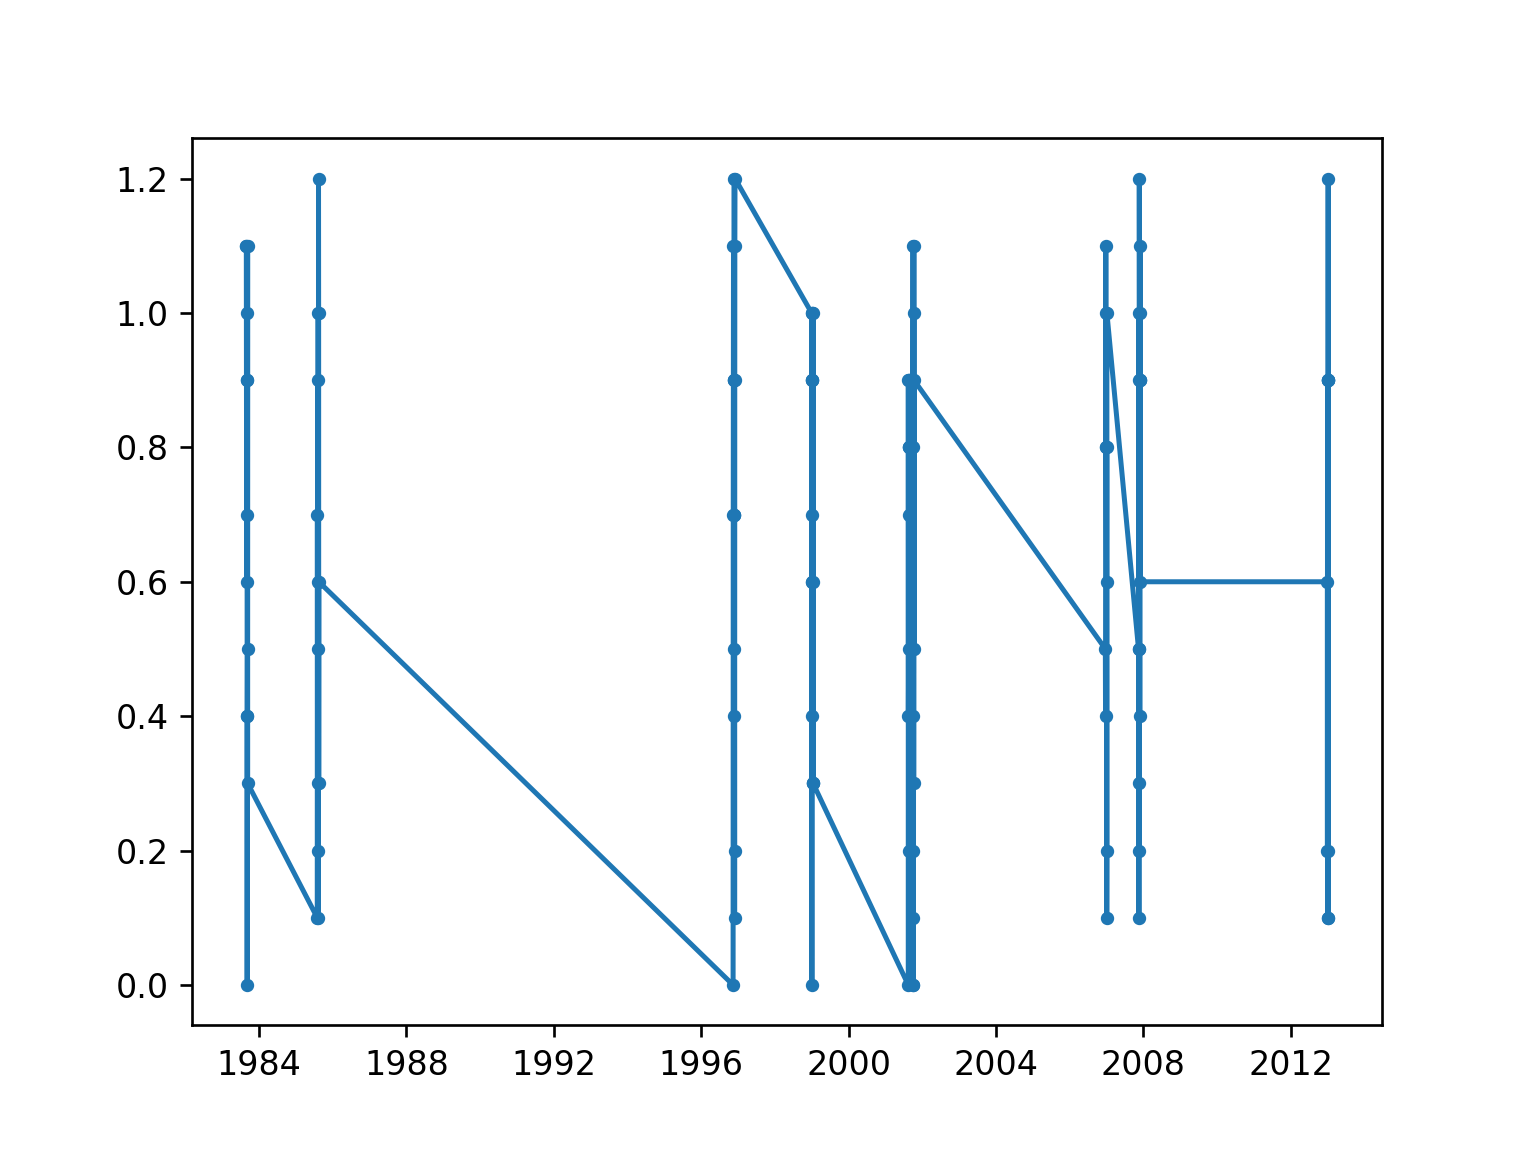

In [265]:
# 2) 
%matplotlib notebook
plt.plot(subdat.LabDateTime, subdat.LabValue,'.-')

In [266]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?
#
# 2) How about the value for January 19, 1992?

In [ ]:
#I would say to my PI that the lab values ranged from 0.1 to 1.2 mg/dL on Aug 6, 1985. 
#Then he would would have to give me the exact time of day for which he wanted a lab value. 
#However, even with the exact time, it is still difficult to compare the data with another data set. 
#This data set looks at measures of metabolism. So you should take into account what people's diet, 
#amount they eat, and when they ate to compare data sets. For data that was taken over 30 years ago, 
#it might be difficult to find this data.
#According to the plot, there are no lab values on January 19, 1992. 
#If lab values were needed for this date, 
#could potentially interpolate the data but even that seems risky.